# Récupérer les données Velib et les visualiser

La société JCDecaux met à disoposition les données Velib pour toutes les villes dont il gère le service (Paris, Besançon, Nantes, Lyon, ...). Les données sont accessibles en temps réel via une API assez simple : [JCDecaux Developer](https://developer.jcdecaux.com/#/home). Le module [pyensae](http://www.xavierdupre.fr/app/pyensae/helpsphinx/index.html) inclut désormais la classe [DataVelibCollect](http://www.xavierdupre.fr/app/pyensae/helpsphinx/pyensae/datasource/data_velib.html?highlight=velib#datasource.data_velib.DataVelibCollect) qui permet de récupérer ces données et d'effectuer quelques traitements simples.

Tout d'abord, il est nécessaire d'obtenir une clé en vous enregistrant sur le site de JCDecaux : [Votre compte développeur](https://developer.jcdecaux.com/#/signup). Le code suivant permet de récupérer des données pendant 5 minutes :

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyensae.datasource import DataVelibCollect
import os
import datetime
folder = r"c:\temp\data_velib"
if not os.path.exists(folder): os.makedirs(folder)

In [3]:
stop = datetime.datetime.now() + datetime.timedelta(minutes=5)

DataVelibCollect.run_collection ("390c7b633172b220d4af72dd9d23cb26dfe60105",
            contract = "Besancon",
            folder_file = folder + "/besancon",
            stop_datetime = stop)  # remplace par None pour récupérer les données sans s'arrêter

DataVelib.collecting_data:  1  times:  2016-02-23 22:24:36.298209  delay =  0:01:00 next 2016-02-23 22:25:36.298209  delays  1.2
DataVelib.collecting_data:  2  times:  2016-02-23 22:25:38.042837  delay =  0:01:00 next 2016-02-23 22:26:36.298209  delays  1.2
DataVelib.collecting_data:  3  times:  2016-02-23 22:26:38.515203  delay =  0:01:00 next 2016-02-23 22:27:36.298209  delays  1.2
DataVelib.collecting_data:  4  times:  2016-02-23 22:27:37.733251  delay =  0:01:00 next 2016-02-23 22:28:36.298209  delays  1.2
DataVelib.collecting_data:  5  times:  2016-02-23 22:28:38.300924  delay =  0:01:00 next 2016-02-23 22:29:36.298209  delays  1.2


On liste les fichiers dans le répertoire :

In [4]:
os.listdir(folder)

['besancon.2016-02-23_21-57-12.589145.txt',
 'besancon.2016-02-23_21-58-14.319541.txt',
 'besancon.2016-02-23_21-59-14.800484.txt',
 'besancon.2016-02-23_22-00-13.884024.txt',
 'besancon.2016-02-23_22-01-14.186251.txt',
 'besancon.2016-02-23_22-24-36.298209.txt',
 'besancon.2016-02-23_22-25-38.042837.txt',
 'besancon.2016-02-23_22-26-38.515203.txt',
 'besancon.2016-02-23_22-27-37.733251.txt',
 'besancon.2016-02-23_22-28-38.300924.txt',
 'resume_besancon.txt',
 'resume_besancon.xlsx']

On construit un DataFrame à partir de ces données :

In [6]:
df = DataVelibCollect.to_df(folder, "^besancon.*[.]txt")
df.to_csv(os.path.join(folder, "resume_besancon.txt"), sep="\t", index=False, encoding="utf8")
df.to_excel(os.path.join(folder, "resume_besancon.xlsx"), index=False)
df[["name","lng","lat","collect_date","available_bike_stands","available_bikes","file"]].head()

,name,lng,lat,collect_date,available_bike_stands,available_bikes,file
0,14 - JACOBINS,6.033465,47.234142,2016-02-23 21:57:12.817959,4,5,besancon.2016-02-23_21-57-12.589145.txt
1,23 - RIVOTTE,6.035136,47.232098,2016-02-23 21:57:12.817959,1,11,besancon.2016-02-23_21-57-12.589145.txt
2,16 - BEAUREGARD,6.032438,47.245026,2016-02-23 21:57:12.817959,4,7,besancon.2016-02-23_21-57-12.589145.txt
3,30 - XAVIER MARMIER,6.006690,47.241256,2016-02-23 21:57:12.817959,7,4,besancon.2016-02-23_21-57-12.589145.txt
4,02 - SQUARE BOUCHOT,6.022070,47.242990,2016-02-23 21:57:12.817959,1,7,besancon.2016-02-23_21-57-12.589145.txt


On visualise les données pour une date donnée :

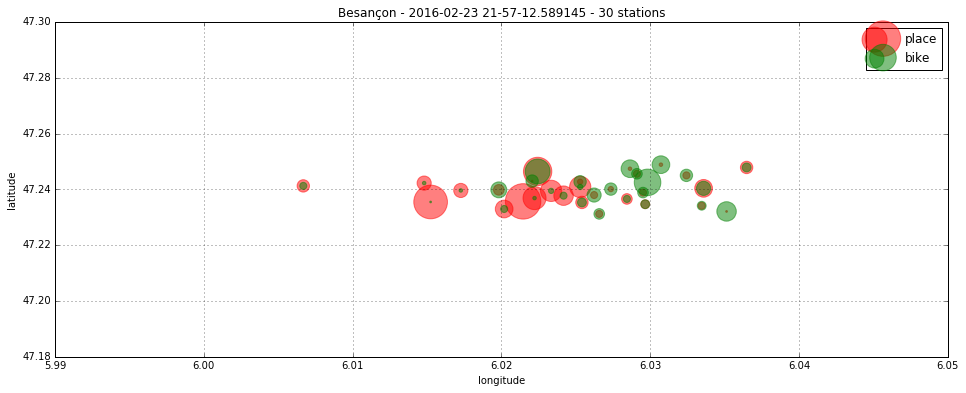

In [8]:
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

On crée une petite animation avec les données velib :


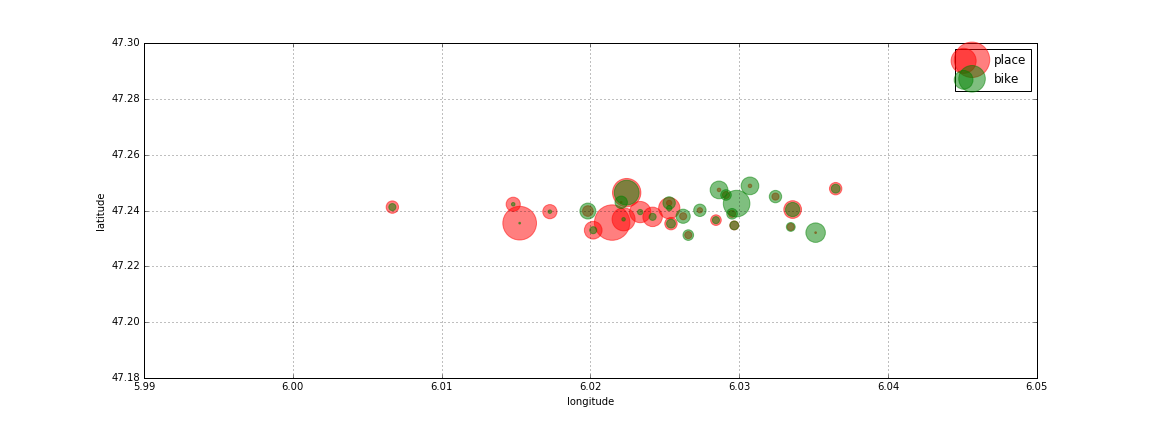

In [10]:
try :
    from JSAnimation import IPython_display
except ImportError:
    # JSAnimation import available at https://github.com/jakevdp/JSAnimation
    import pymyinstall
    pymyinstall.ModuleInstall("JSAnimation", "github", "jakevdp").install(temp_folder="c:\\temp")
    # if it produces an error, try again

DataVelibCollect.js_animation(df, interval = 100, figsize=(16,6))
# it does not work well yet

Ca ne bouge pas trop. Sur cinq minutes, c'est plutôt attendu. On essaye sur plus de données.

In [12]:
from pyensae import download_data
from pyensae.datasource import DataVelibCollect
import pandas
download_data('besancon.df.txt.zip', website = 'xdtd', whereTo = "c:\\temp")  
df = pandas.read_csv(r"c:\temp\besancon.df.txt",sep="\t",encoding="utf8")
len(df)
# la simulation avec matploblib ne fonctionne pas avec autant d'image
#DataVelibCollect.js_animation(df, interval = 100, figsize=(16,6))

22650

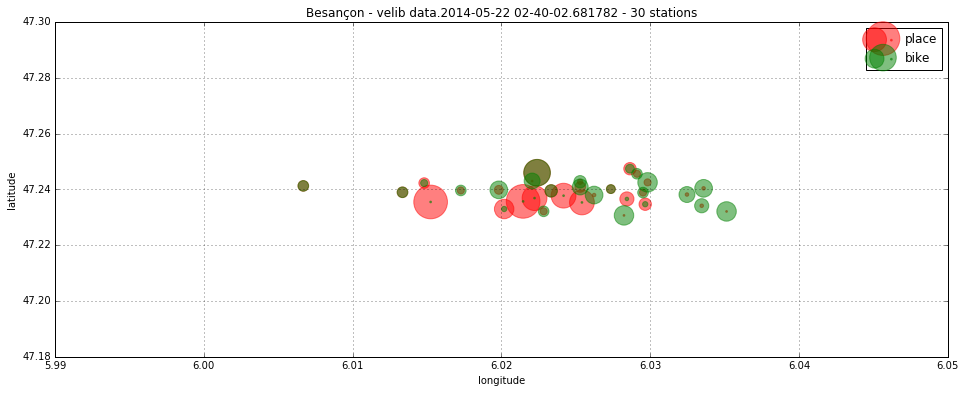

In [14]:
# première image des données
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

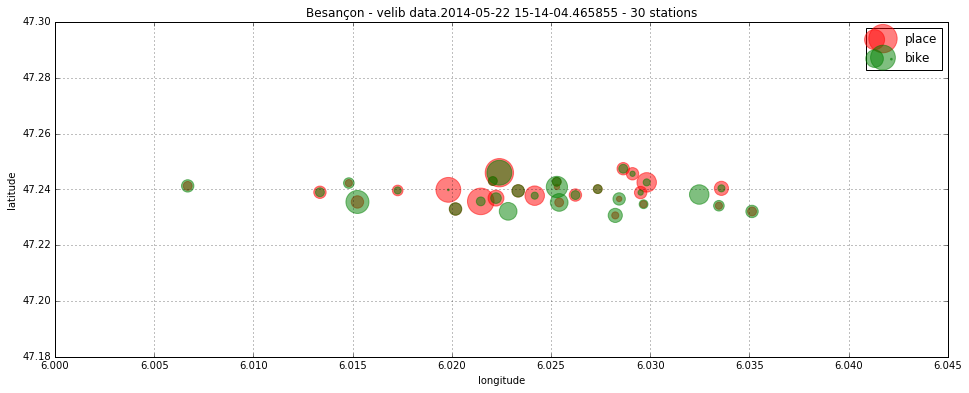

In [16]:
# dernière image
dt = df["file"][len(df)-1]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataVelibCollect.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","").replace(".txt","").replace("_", " "), len(subset)))

Vous trouverez un exemple d'utilisation de ces données ici [Coding Party 22 mai 2014 : inférer des trajectoires de vélos](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/coding_party_1.html) et là [Déterminer la vitesse moyenne des vélib](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/expose_velib.html).

In [18]:
DataVelibCollect.draw(subset, use_folium=True)